In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_img(img):
  plt.figure(figsize=(12, 12))
  plt.axis('off')
  plt.imshow(img)

In [3]:
def find_descriptors(image, keypoints):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    patch_size = 3

    descriptors = []

    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])

        patch = gray_image[y - patch_size:y + patch_size + 1, x - patch_size:x + patch_size + 1]

        patch = (patch - np.mean(patch)) / np.std(patch)

        descriptor = patch.flatten()

        descriptors.append(descriptor)

    descriptors = np.array(descriptors)

    return descriptors

In [4]:
def custom_match(img1,img2):
  fast = cv2.FastFeatureDetector_create()
  keypoints1 = fast.detect(img1, None)
  keypoints2 = fast.detect(img2, None)

  des1 = find_descriptors(img1, keypoints1)
  des2 = find_descriptors(img2, keypoints2)

  des1 = np.float32(des1)
  des2 = np.float32(des2)

  matches = []
  for i, d1 in enumerate(des1, start=0):
      for j, d2 in enumerate(des2, start=0):
          matches.append(cv2.DMatch(_distance=np.linalg.norm(d1 - d2, ord=2), _imgIdx=0, _queryIdx=i, _trainIdx=j))


  matches = sorted(matches, key=lambda x: x.distance)
  match_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)

  plot_img(match_image)

In [5]:
def built_in_match(img1,img2):
  fast = cv2.FastFeatureDetector_create()
  keypoints1 = fast.detect(img1, None)
  keypoints2 = fast.detect(img2, None)

  des1 = find_descriptors(img1, keypoints1)
  des2 = find_descriptors(img2, keypoints2)

  des1 = np.float32(des1)
  des2 = np.float32(des2)

  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)

  matches = sorted(matches, key=lambda x: x.distance)

  match_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)

  plot_img(match_image)

In [6]:
def rotate_match(img):
  img2= cv2.rotate(img1[100:250, 200:350], cv2.ROTATE_90_CLOCKWISE)

  fast = cv2.FastFeatureDetector_create()
  keypoints1 = fast.detect(img1, None)
  keypoints2 = fast.detect(img2, None)

  des1 = find_descriptors(img1, keypoints1)
  des2 = find_descriptors(img2, keypoints2)

  des1 = np.float32(des1)
  des2 = np.float32(des2)
  matches = []
  for i, d1 in enumerate(des1, start=0):
      for j, d2 in enumerate(des2, start=0):
          matches.append(cv2.DMatch(_distance=np.linalg.norm(d1 - d2, ord=2), _imgIdx=0, _queryIdx=i, _trainIdx=j))

  matches = sorted(matches, key=lambda x: x.distance)

  match_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)

  plot_img(match_image)

In [7]:
img1 = cv2.cvtColor(cv2.imread('img1.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('img2.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread('download.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread('download2.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

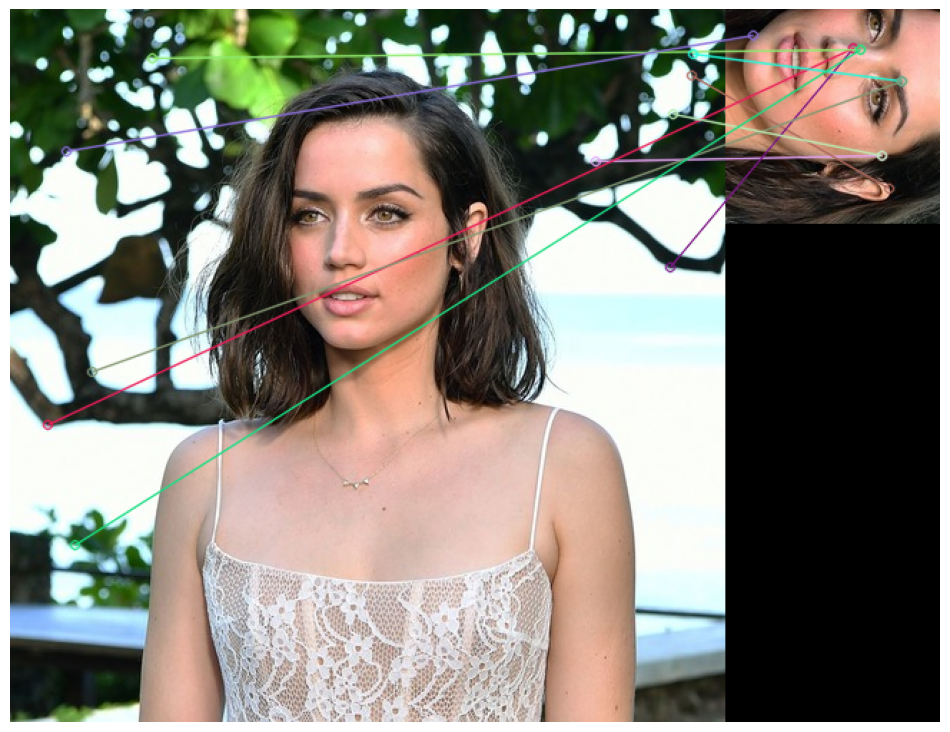

In [8]:
rotate_match(img1)

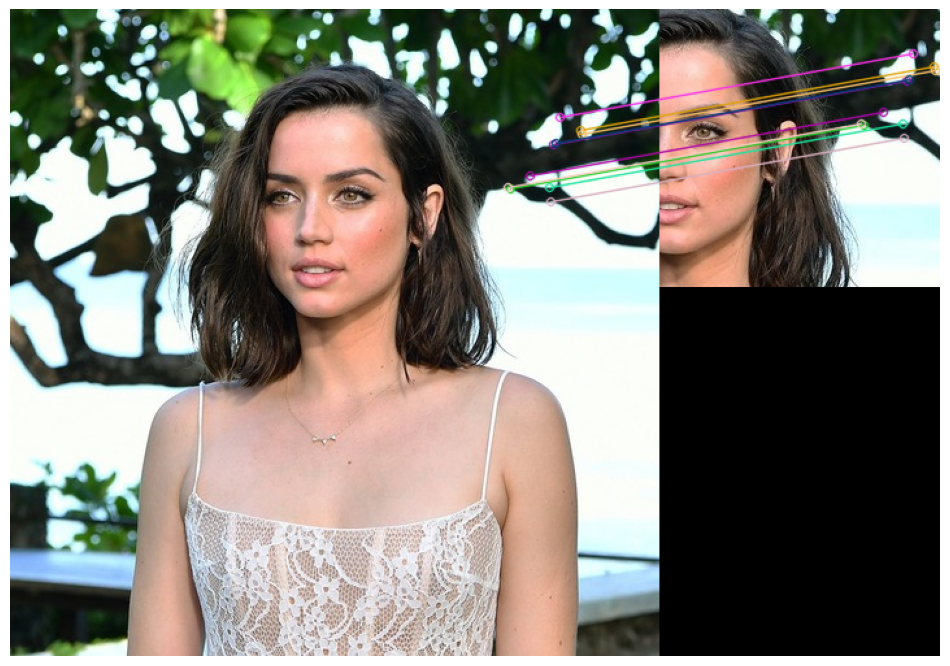

In [9]:
custom_match(img1,img2)

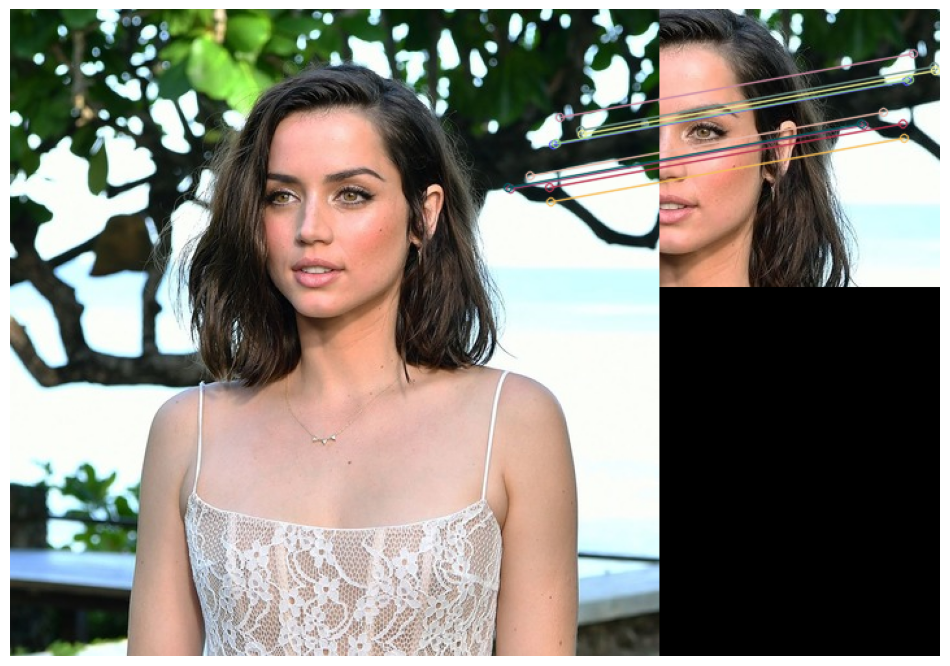

In [10]:
built_in_match(img1,img2)

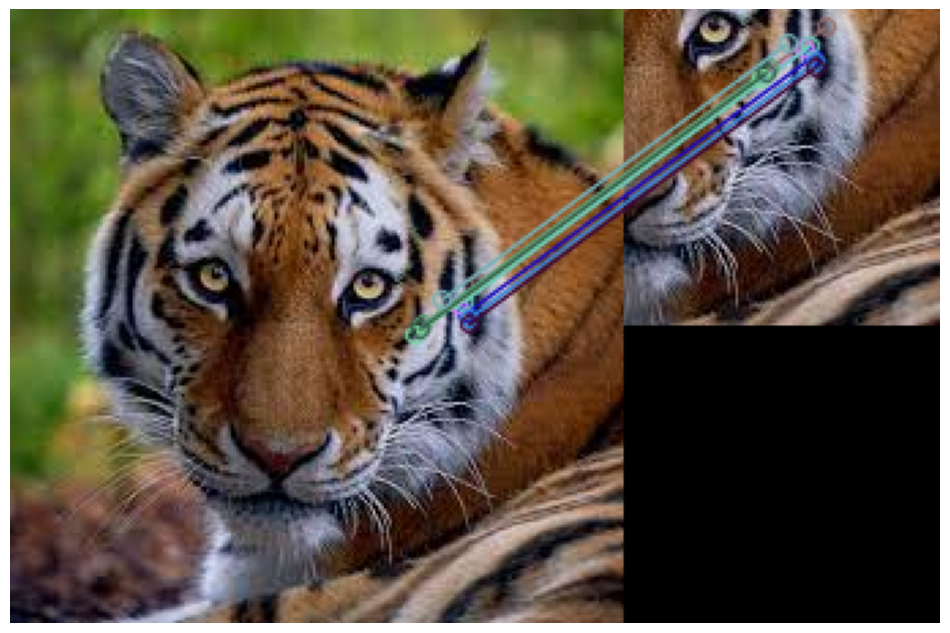

In [11]:
custom_match(img3,img4)

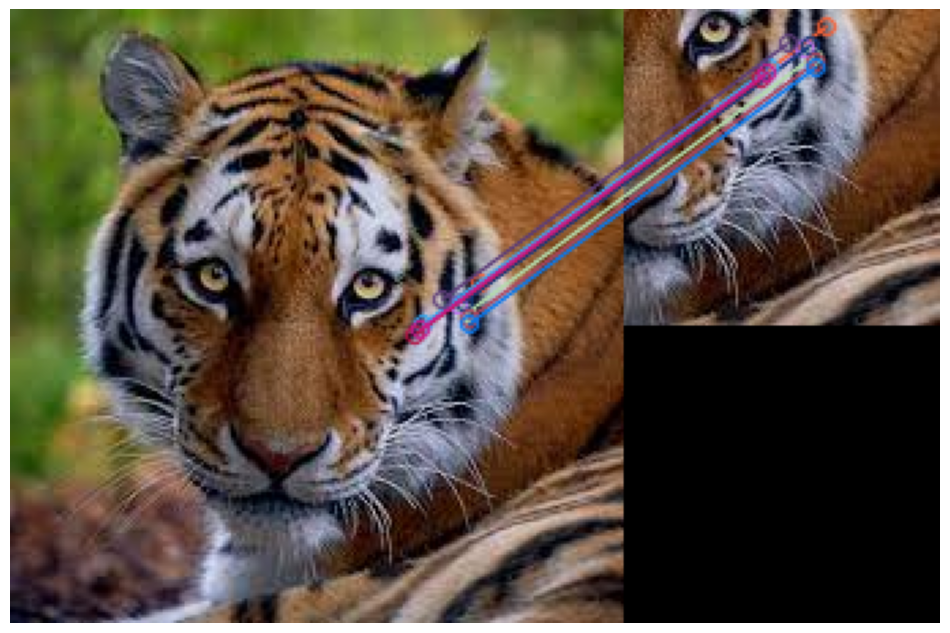

In [12]:
built_in_match(img3,img4)